In [1]:
import numpy as np
import pandas as pd

In [17]:
df_m=pd.read_csv('movie_data/movies.csv')

In [53]:
df_m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
df_r=pd.read_csv('movie_data/ratings.csv')

In [69]:
df_r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [70]:
print(df_r['userId'].nunique())

610


In [31]:
df_t=pd.read_csv('movie_data/tags.csv')

In [32]:
df_t.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [39]:

# Merge movies and ratings DataFrames on 'movieid'
df_merge = pd.merge(df_m, df_r, on='movieId', how='inner')

# Group by movie title and count the number of ratings for each movie
r_count = df_merge.groupby('title').size().reset_index(name='r_count')

# movie with the maximum number of ratings
max_rated_movie = r_count.loc[r_count['r_count'].idxmax()]

print("Movie with the maximum number of user ratings:")
print(max_rated_movie['title'])


Movie with the maximum number of user ratings:
Forrest Gump (1994)


In [45]:

m_id = df_merge.loc[df_merge['title'] == 'Matrix, The (1999)', 'movieId'].values[0]


matrix_tags = df_t.loc[df_t['movieId'] == m_id, 'tag']

print(f'Tags for "Matrix, The (1999)":\n{matrix_tags.tolist()}')


Tags for "Matrix, The (1999)":
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [47]:


mv_terminator2 = df_m.loc[df_m['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

rt_terminator2 = df_r.loc[df_r['movieId'] == mv_terminator2, 'rating']

average_rating = rt_terminator2.mean()


print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')

The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


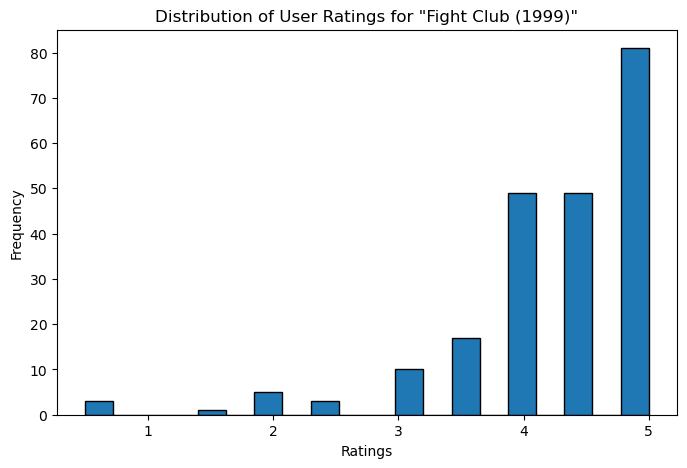

In [50]:
import matplotlib.pyplot as plt

fight_club_ratings = df_merge[df_merge['title'].str.contains("Fight Club \(1999\)")]
plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings['rating'], bins=20, edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [58]:
import pandas as pd

# Count the number of ratings for each movie
r_count = df_merge['title'].value_counts().reset_index()
r_count.columns = ['title', 'r_count']

# Select top 5 movies with the highest number of ratings
top_5_movies = r_count.head(5)

print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies)

Top 5 popular movies based on the number of user ratings:
                              title  r_count
0               Forrest Gump (1994)      329
1  Shawshank Redemption, The (1994)      317
2               Pulp Fiction (1994)      307
3  Silence of the Lambs, The (1991)      279
4                Matrix, The (1999)      278


In [ ]:
sci_fi_movies = df_merge[df_merge['genres'].str.contains('Sci-Fi')]


r_count = sci_fi_movies['title'].value_counts().reset_index()
r_count.columns = ['title', 'r_count']


top3_popular = r_count.iloc[2] if len(r_count) >= 3 else None

if top3_popular is not None:
    print("Third most popular Sci-Fi movie based on user ratings:")
    print(third_most_popular['title'])
else:
    print("There are fewer than three Sci-Fi movies in the dataset.")


In [51]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'AggregateRatingButton__RatingScore-sc-1ll29m0-1'})
    return imdb_rating.text if imdb_rating else np.nan


In [60]:
pip install IMDbPY


     -------------------------------------- 297.2/297.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
import imdb

# creating instance of IMDb
ia = imdb.IMDb()

# getting the top 250 movies
top250 = ia.get_top250_movies()

# getting the movie with highest rating
highest_rated_movie = top250[0]
highest_rated_movie
# getting the movie ID
movie_id = highest_rated_movie.movieID
# printing the movie ID
print("The movie ID of the movie with the highest IMDB rating is:", movie_id)

IndexError: list index out of range

In [67]:
import imdb

# creating instance of IMDb
ia = imdb.IMDb()

# getting the top 250 Sci-Fi movies
top250 = ia.get_top250_movies()

# filtering the top 250 Sci-Fi movies
top_scifi = [movie for movie in top250 if 'Sci-Fi' in movie['genres']]

# getting the movie with highest rating
highest_rated_movie = top_scifi[0]

# getting the movie ID
movie_id = highest_rated_movie.movieID

# printing the movie ID
print("The movie ID of the Sci-Fi movie with the highest IMDB rating is:", movie_id)

IndexError: list index out of range